# Lecture 4 Workbook
## Parametric methods
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy.stats import gamma, norm, t
import pandas as pd
from IPython.display import HTML


In [83]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [84]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [85]:
d = pd.read_csv('cerebellar_volumes.csv')


## The distribution of the sample mean

### Generate animation of central limit theorem in action

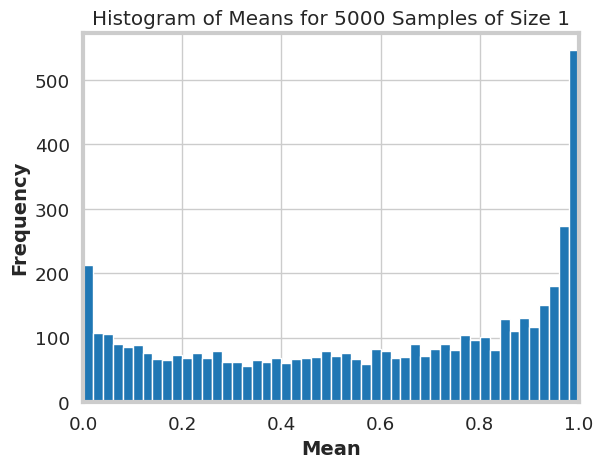

In [86]:
# define the non-normal distribution
def non_normal_distribution(x):
    return np.exp(-x ** 2)

# set the number of samples to generate
num_samples = 5000

# set the sample sizes to loop through
sample_sizes = [1, 2, 5, 10, 30, 50, 100]

# set the number of bins for the histograms
num_bins = 50

# initialize the figure
fig, ax = plt.subplots()

# define the animation function
def update(frame):
    # compute the sample size for this frame
    sample_size = sample_sizes[frame % len(sample_sizes)]

    # generate the sample of random variables for this frame
    sample = non_normal_distribution(np.random.randn(sample_size * num_samples))

    # compute the mean of each sample
    sample_means = np.mean(sample.reshape(-1, sample_size), axis=1)

    # plot the histogram of the means
    ax.clear()
    ax.hist(sample_means, bins=num_bins)
    ax.set_xlim(0, 1)
    ax.set_title('Histogram of Means for {} Samples of Size {}'.format(num_samples, sample_size))
    ax.set_xlabel('Mean')
    ax.set_ylabel('Frequency')

    # return the artists for this frame
    return ax,

# create the animation
ani = animation.FuncAnimation(fig, update, frames=len(sample_sizes) * 3, interval=1000, repeat=True)

# render the animation as a video using HTML
video = ani.to_html5_video()
HTML(video)

## A confidence interval for the mean

### Show distribution of mean for models
Superimposed on the data.

In [87]:
TCV_Corr = d.TCV_Corr
numCblm = 60

# Randomly sample 60 cerebellar volumes
cblmSample = TCV_Corr.sample(numCblm)
xBarSample = np.mean(cblmSample)
sSample = np.std(cblmSample)
NSample = len(cblmSample)

In [88]:
model1Mu = np.max(cblmSample)
model2Mu = xBarSample - 2*sSample/np.sqrt(NSample)
modelSMu = sSample/np.sqrt(NSample)


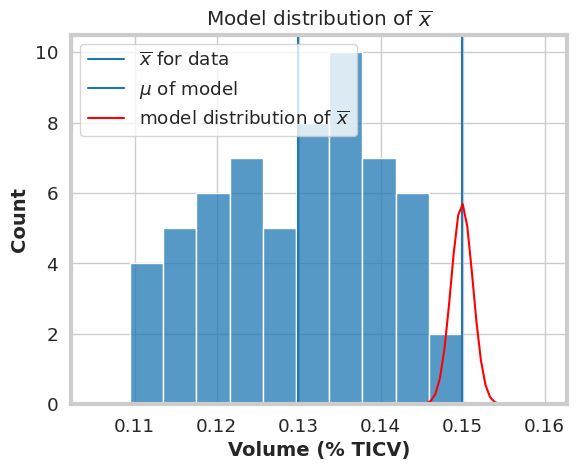

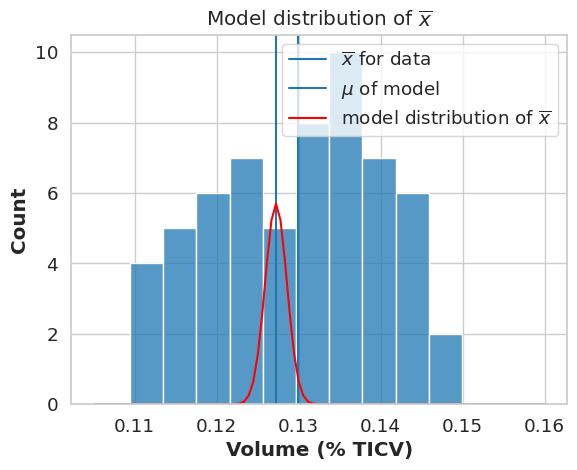

In [89]:

def drawSample(sample, model_mu, model_s):
  n_bins = 10
  xbar = np.mean(sample)
  x_norm = np.linspace(start=0.105, stop=0.16, num=100)
  norm_scale = np.sqrt(2*np.pi)*model_s*len(sample)*0.95/n_bins;


  # Plot a histogram of the sample using Seaborn
  sns.histplot(data=sample, kde=False, bins=10)
  sns.set_style("whitegrid")
  sns.set_context("notebook", font_scale=1.2)

  plt.axvline(x=xbar, label="$\overline{x}$ for data")
  plt.axvline(x=model_mu, label="$\mu$ of model")
  plt.plot(x_norm, norm.pdf(x_norm, model_mu, model_s)*norm_scale, 'r', label="model distribution of $\overline{x}$")

  plt.xlabel('Volume (% TICV)')
  plt.ylabel('Count')
  plt.title('Model distribution of $\overline{x}$')
  plt.legend()

plt.figure()  
drawSample(cblmSample, model1Mu, modelSMu)

plt.figure()
drawSample(cblmSample, model2Mu, modelSMu)


### Show a labeled tail for a normal distribution

Text(2.0448536269514723, 0.15, '$\\alpha$')

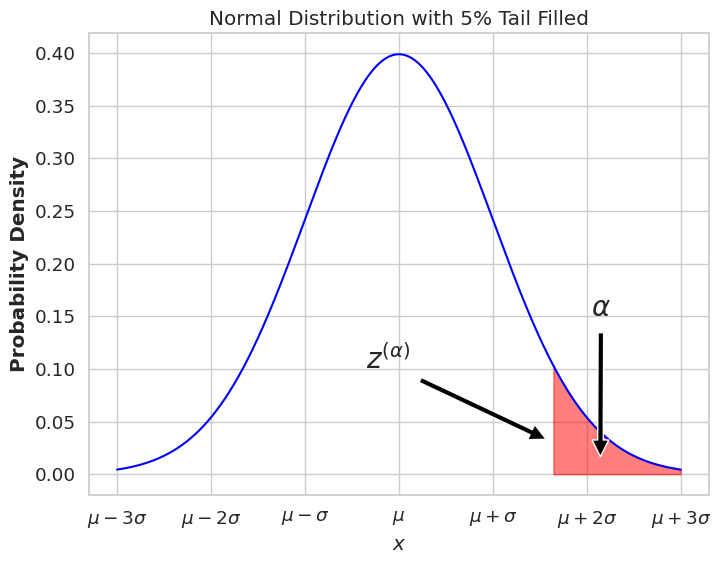

In [90]:
alpha = 0.05

z_alpha = norm.ppf(1 - alpha)
x = np.linspace(-3, 3, 1000)
pdf = norm.pdf(x)
fill_x = np.linspace(z_alpha, 3, 1000)
fill_y = norm.pdf(fill_x)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, pdf, 'b-')
ax.fill_between(fill_x, fill_y, color='r', alpha=0.5, label=r'$\alpha$')
ax.set_title('Normal Distribution with 5% Tail Filled')
ax.set_xlabel(r'$x$')
ax.set_ylabel('Probability Density')
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels([r'$\mu - 3\sigma$', r'$\mu - 2\sigma$', r'$\mu - \sigma$', r'$\mu$', r'$\mu + \sigma$', r'$\mu + 2\sigma$', r'$\mu + 3\sigma$'])
ax.annotate(r'$z^{(\alpha)}$', xy=(z_alpha, 0.03), xytext=(z_alpha-2, 0.1), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
ax.annotate(r'$\alpha$', xy=(z_alpha+0.5, 0.01), xytext=(z_alpha+0.4, 0.15), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)


### Show confidence interval for a generic mean


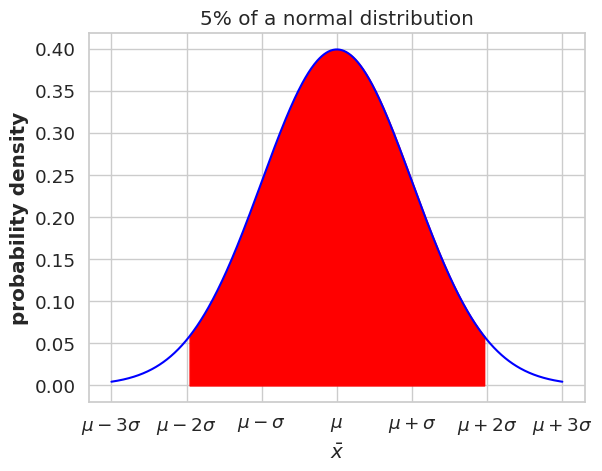

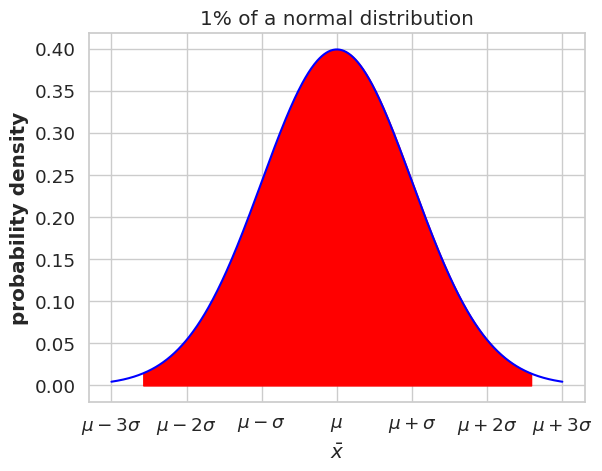

In [91]:
def plot_generic_confidence(p):
  tail = 1-p
  c_min = norm.ppf(tail/2)
  c_max = norm.ppf(1-(tail/2))

  dx = 0.01
  x = np.arange(-3, 3+dx, dx)

  plt.plot(x, norm.pdf(x), 'b-')
  plt.fill_between(np.arange(c_min, c_max+dx, dx), norm.pdf(np.arange(c_min, c_max+dx, dx)), color='r')
  plt.xticks(ticks=[-3, -2, -1, 0, 1, 2, 3], labels=[r'$\mu-3\sigma$', r'$\mu-2\sigma$', r'$\mu-\sigma$', r'$\mu$', 
                    r'$\mu+\sigma$', r'$\mu+2\sigma$', r'$\mu+3\sigma$'])

  plt.title(f'{(1-p)*100:.0f}% of a normal distribution')
  plt.ylabel('probability density')
  plt.xlabel(r'$\bar{x}$')

plt.figure()
plot_generic_confidence(0.95)

plt.figure()
plot_generic_confidence(0.99)

### Bone mineral density example
Data generated on the basis of data in Emaus AmJEpidem 2006

[Original paper](https://academic.oup.com/aje/article/163/5/441/61104)

In [92]:
N = 166
DBMD = norm.rvs(loc=-1.49, scale=2.67, size=N)

array([-9.78339275, -8.97843547, -8.17347818, -7.3685209 , -6.56356361,
       -5.75860633, -4.95364905, -4.14869176, -3.34373448, -2.53877719,
       -1.73381991, -0.92886263, -0.12390534,  0.68105194,  1.48600923,
        2.29096651,  3.09592379,  3.90088108,  4.70583836,  5.51079565,
        6.31575293])

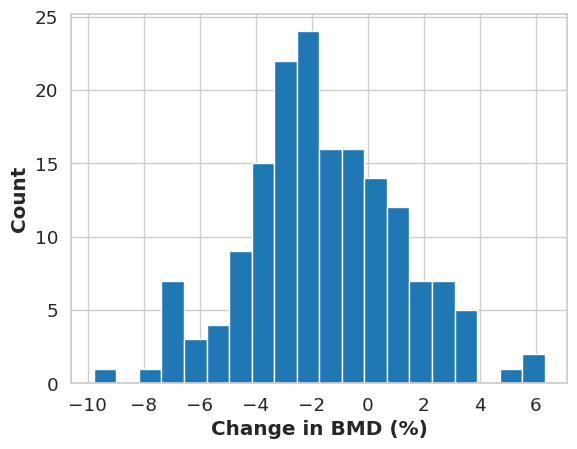

In [93]:
def plot_sample():
  counts, bins, patches = plt.hist(DBMD, bins=20, label="Data")
  plt.xlabel('Change in BMD (%)')
  plt.ylabel('Count')
  return bins

plot_sample()

In [94]:
mean_DBMD = np.mean(DBMD)
std_DBMD = np.std(DBMD)
se_DBMD = std_DBMD / np.sqrt(N)

print(mean_DBMD)
print(std_DBMD)
print(se_DBMD)

-1.6104077264887298
2.7435867094294193
0.21294362668445516


### Add null model to data

In [95]:
null_mu = 0

In [96]:
effectSize = mean_DBMD/std_DBMD
print(f'Effect size = {effectSize:.2f}')

Effect size = -0.59


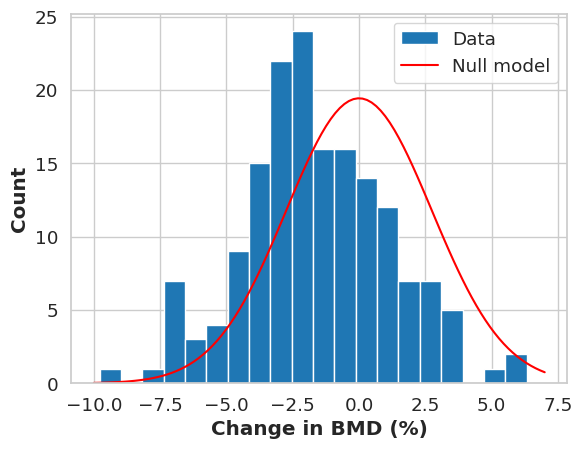

In [97]:
def plot_sample_plus_null():
  bins = plot_sample()
  bin_width = bins[1]-bins[0]
  x = np.linspace(start=-10, stop=7, num=100)
  plt.plot(x, norm.pdf(x, null_mu, std_DBMD)*N*bin_width, 'r', label="Null model")

plot_sample_plus_null()
plt.legend()

### Add confidence interval to data and null model

-2.03 < $\mu$ < -1.19


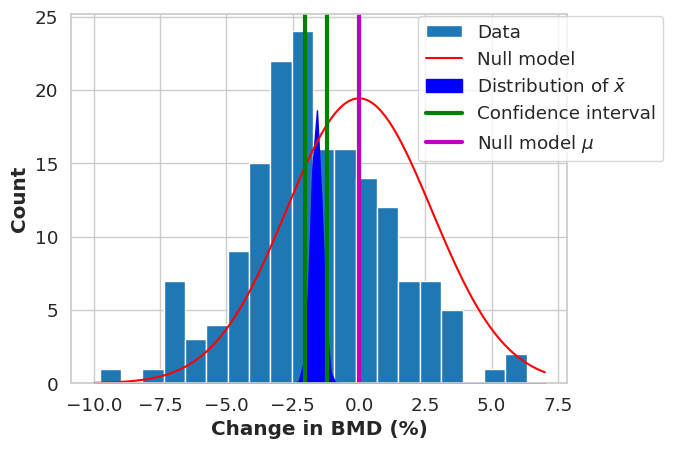

In [98]:
alpha = 0.05
z_alpha = norm.ppf([alpha/2, 1-alpha/2], 0, 1)

Conf = mean_DBMD + z_alpha*se_DBMD

plot_sample_plus_null()
x = np.linspace(start=-10, stop=7, num=100)
plt.fill_between(x, norm.pdf(x, mean_DBMD, se_DBMD)*10, color='b', label=r"Distribution of $\bar{x}$")
plt.axvline(Conf[0], color='g', linewidth=3, label="Confidence interval")
plt.axvline(Conf[1], color='g', linewidth=3)
plt.axvline(0, color='m', linewidth=3, label=r"Null model $\mu$")
plt.legend(loc=[0.7, 0.6])

print(f"{Conf[0]:.2f} < $\mu$ < {Conf[1]:.2f}")

## The confidence interval and the acceptance region

### Calculate key values

In [99]:
# Create t-distribution objects
t_dist_ci = t(df=N-1, loc=mean_DBMD, scale=se_DBMD)
t_dist_acc = t(df=N-1, loc=0, scale=se_DBMD)

# Set significance level
alpha = 0.05

# Calculate critical values
ci = t_dist_ci.interval(1-alpha)
acceptance = t_dist_acc.interval(1-alpha)



### Plot the two distributions

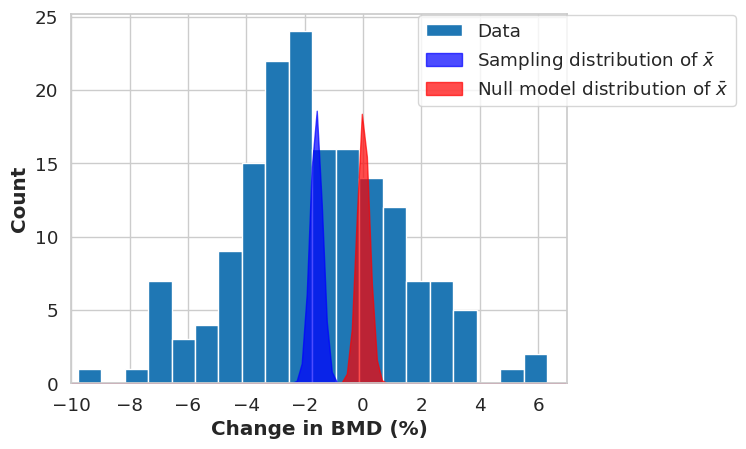

In [100]:
# Plot PDFs and shaded areas
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aCI = ax.fill_between(x, t_dist_ci.pdf(x)*10, alpha=0.7, color='b', label=r'Sampling distribution of $\bar{x}$')
aAcc = ax.fill_between(x, t_dist_acc.pdf(x)*10, alpha=0.7, color='r', label=r'Null model distribution of $\bar{x}$')

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.75])

### The confidence interval and the null model value

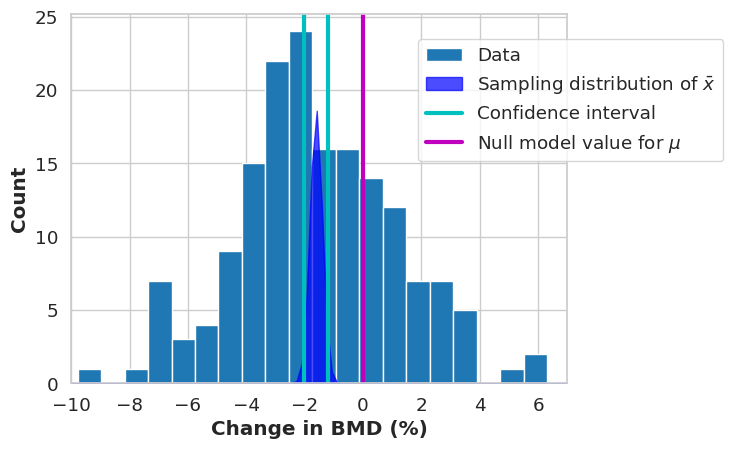

In [101]:
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aCI = ax.fill_between(x, t_dist_ci.pdf(x)*10, alpha=0.7, color='b', label=r'Sampling distribution of $\bar{x}$')

# Plot critical value lines
ax.axvline(ci[0], color='c', linewidth=3, label='Confidence interval')
ax.axvline(ci[1], color='c', linewidth=3)
ax.axvline(0, color='m', linewidth=3, label='Null model value for $\mu$')

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.6])

### The acceptance region and the true $\bar{x}$

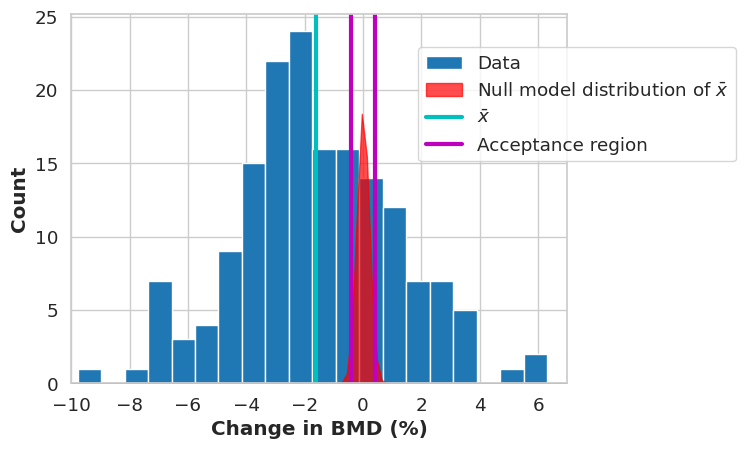

In [102]:
plot_sample()
ax=plt.gca()
x = np.linspace(start=-10, stop=7, num=100)
aAcc = ax.fill_between(x, t_dist_acc.pdf(x)*10, alpha=0.7, color='r', label=r'Null model distribution of $\bar{x}$')

# Plot critical value lines
ax.axvline(mean_DBMD, color='c', linewidth=3, label=r'$\bar{x}$')
ax.axvline(acceptance[0], color='m', linewidth=3, label='Acceptance region')
ax.axvline(acceptance[1], color='m', linewidth=3)

# Set x-axis limit
ax.set_xlim([-10, 7])

# Add legend
ax.legend(loc=[0.7, 0.6])

## The confidence interval and the t distribution

### Testing the width of the normal confidence interval

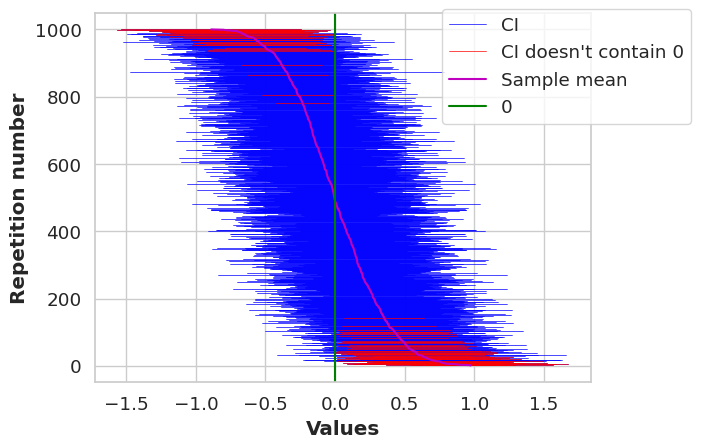

In [103]:
X025 = norm.ppf(0.025)
X975 = norm.ppf(0.975)

N = 10
NumReps = 1000
Samples = norm.rvs(0, 1, size=(N, NumReps))
SampleMean = np.mean(Samples, axis=0)
SampleStd = np.std(Samples, axis=0, ddof=1)
MeanStd = SampleStd/np.sqrt(N)

ConfLow = SampleMean + X025*MeanStd
ConfHigh = SampleMean + X975*MeanStd

Conf = np.vstack((ConfLow, ConfHigh, SampleMean)).T
SortedConf = Conf[Conf[:, 2].argsort()]
SortedNoZero = np.logical_or(SortedConf[:, 0] > 0, SortedConf[:, 1] < 0)
YVals = np.vstack((np.arange(NumReps, 0, -1), np.arange(NumReps, 0, -1)))

fig, ax = plt.subplots()
ax.plot(SortedConf[:, 0:2].T, YVals, 'b-', linewidth=0.5, label="CI")
ax.plot(SortedConf[SortedNoZero, 0:2].T, YVals[:, SortedNoZero], 'r-', linewidth=0.5, label="CI doesn't contain 0")
ax.plot(SortedConf[:, 2], YVals[0,:].T, 'm-', linewidth=1.5, label="Sample mean")
ax.axvline(x=0, color='g', label="0")
ax.set_xlabel('Values')
ax.set_ylabel('Repetition number')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=[0.7, 0.7])

#### Find number of confidence intervals that don't contain 0

In [104]:
NoZero = np.where(np.logical_or(ConfLow > 0, ConfHigh < 0))[0]
NumNoZero = len(NoZero)
PNoZero = NumNoZero/NumReps

print(f"NumNoZero = {NumNoZero}")
print(f"PNoZero = {PNoZero}")

NumNoZero = 87
PNoZero = 0.087


#### Do it for different sample sizes

In [105]:
NumReps = 50000

AllNs = np.concatenate([np.arange(4, 11, 2), np.arange(20, 101, 10)])
NumNs = len(AllNs)

PNoZero = np.zeros(NumNs)
for NNum in range(NumNs):
    N = AllNs[NNum]
    Samples = norm.rvs(0, 1, size=(N, NumReps))
    SampleMean = np.mean(Samples, axis=0)
    SampleStd = np.std(Samples, axis=0, ddof=1)
    MeanStd = SampleStd/np.sqrt(N)

    ConfLow = SampleMean + X025*MeanStd
    ConfHigh = SampleMean + X975*MeanStd

    NoZero = np.where((ConfLow > 0) | (ConfHigh < 0))[0]
    NumNoZero = len(NoZero)
    PNoZero[NNum] = NumNoZero/NumReps


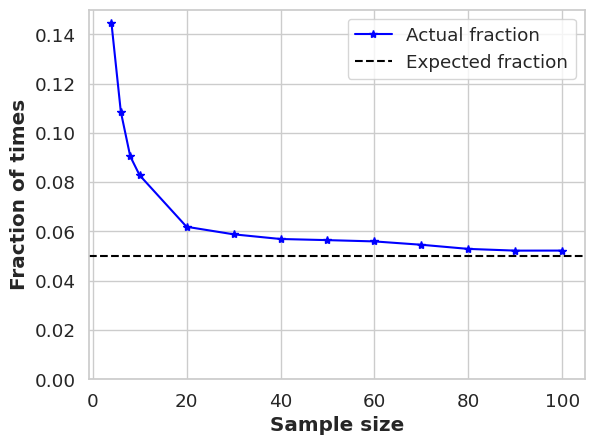

In [106]:
plt.figure()
plt.plot(AllNs, PNoZero, 'b-*', label="Actual fraction")
plt.axhline(0.05, color='k', linestyle='--', label="Expected fraction")
plt.xlabel('Sample size')
plt.ylabel('Fraction of times')
plt.ylim([0, 0.15])
plt.legend()

### Show t distribution

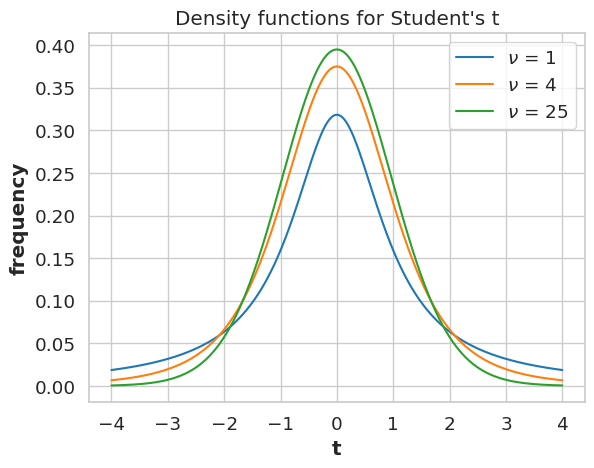

In [107]:
AllNu = [1, 4, 25]
NumNu = len(AllNu)
XVals = np.arange(-4, 4.01, 0.01)
NumX = len(XVals)
tPDF = t.pdf(np.tile(XVals, (NumNu, 1)).T, np.tile(AllNu, (NumX, 1)))

plt.figure()
plt.plot(XVals, tPDF)
plt.xlabel('t')
plt.ylabel('frequency')
plt.title("Density functions for Student's t")
plt.legend([rf"$\nu$ = {nu}" for nu in AllNu])

### Redo test of confidence interval with t based interval

In [108]:
NumReps = 50000

AllNs = np.concatenate((np.arange(4, 11, 2), np.arange(20, 101, 10)))
NumNs = len(AllNs)

PNoZero = np.zeros(NumNs)
talpha = np.zeros(NumNs)
for NNum in range(NumNs):
    N = AllNs[NNum]
    X025 = t.ppf(0.025, N-1)
    X975 = t.ppf(0.975, N-1)

    Samples = norm.rvs(loc=0, scale=1, size=(N, NumReps))
    SampleMean = np.mean(Samples, axis=0)
    SampleStd = np.std(Samples, axis=0, ddof=1)
    MeanStd = SampleStd/np.sqrt(N)

    ConfLow = SampleMean + X025*MeanStd
    ConfHigh = SampleMean + X975*MeanStd

    NoZero = np.where((ConfLow > 0) | (ConfHigh < 0))[0]
    NumNoZero = len(NoZero)
    PNoZero[NNum] = NumNoZero/NumReps
    talpha[NNum] = X975



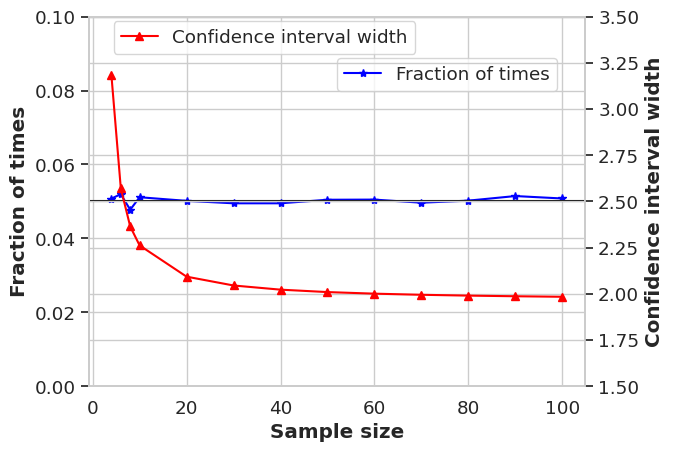

In [109]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(AllNs, PNoZero, 'b-*', label='Fraction of times')
ax2.plot(AllNs, talpha, 'r-^', label='Confidence interval width')
ax2.set_ylim([1.5, 3.5])
ax.set_xlabel('Sample size')
ax.set_ylabel('Fraction of times')
ax2.set_ylabel('Confidence interval width')
ax.set_ylim([0, 0.1])
ax2.legend(loc=[0.05, 0.9])
ax.legend(loc=[0.5, 0.8])
ax.axhline(y=0.05, color='k', linestyle='-')